## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb

## Import datasets and take a quick glance

In [3]:
df_total = pd.read_csv(r'/Users/ngohoanganh/Desktop/COVID19_VN_MOH_MLmodels/predict-LOS(length-of-stay)/assets/processed/df_total.csv', encoding="utf-8")
# remove patients 172, 173, 174 of df_total due to lack of information
df_total = df_total[~(df_total["PATIENT_NO"].isin([172, 173, 174]))]

df_train = pd.read_csv(r'/Users/ngohoanganh/Desktop/COVID19_VN_MOH_MLmodels/predict-LOS(length-of-stay)/assets/processed/df_train.csv', encoding="utf-8")

df_test = pd.read_csv(r'/Users/ngohoanganh/Desktop/COVID19_VN_MOH_MLmodels/predict-LOS(length-of-stay)/assets/processed/df_test.csv', encoding="utf-8")
# remove patients 172, 173, 174 of df_test due to lack of information
df_test = df_test[~(df_test["PATIENT_NO"].isin([172, 173, 174]))]

In [4]:
df_total.info()
df_total.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Data columns (total 17 columns):
PATIENT_NO            171 non-null int64
AGE                   171 non-null float64
SEX                   171 non-null int64
ORIGIN_EUROPE         171 non-null int64
ORIGIN_CHINA          171 non-null int64
ORIGIN_US             171 non-null int64
ORIGIN_ASEAN          171 non-null int64
ORIGIN_DOMESTIC       171 non-null int64
DAYS_OF_ONSET         171 non-null int64
ONSET_FEVER           171 non-null int64
ONSET_COUGH           171 non-null int64
ONSET_TIRED           171 non-null int64
ONSET_SORETHROAT      171 non-null int64
ONSET_RESPIRATORY     171 non-null int64
BACKGROUND_DISEASE    171 non-null int64
HOSPITAL              171 non-null int64
LOS                   20 non-null float64
dtypes: float64(2), int64(15)
memory usage: 24.0 KB


,PATIENT_NO,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,LOS
166,167,20.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,NaN
167,168,49.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,NaN
168,169,49.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,NaN
169,170,27.0,1,0,0,0,0,1,5,1,0,0,0,0,0,0,NaN
170,171,19.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,NaN


In [5]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
PATIENT_NO            20 non-null int64
AGE                   20 non-null float64
SEX                   20 non-null int64
ORIGIN_EUROPE         20 non-null int64
ORIGIN_CHINA          20 non-null int64
ORIGIN_US             20 non-null int64
ORIGIN_ASEAN          20 non-null int64
ORIGIN_DOMESTIC       20 non-null int64
DAYS_OF_ONSET         20 non-null int64
ONSET_FEVER           20 non-null int64
ONSET_COUGH           20 non-null int64
ONSET_TIRED           20 non-null int64
ONSET_SORETHROAT      20 non-null int64
ONSET_RESPIRATORY     20 non-null int64
BACKGROUND_DISEASE    20 non-null int64
HOSPITAL              20 non-null int64
LOS                   20 non-null int64
dtypes: float64(1), int64(16)
memory usage: 2.7 KB


,PATIENT_NO,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,LOS
0,1,66.0,1,0,1,0,0,0,6,0,0,0,0,0,2,1,20
1,2,28.0,1,0,1,0,0,0,3,0,0,0,0,0,0,1,12
2,3,25.0,0,0,1,0,0,0,7,0,0,0,0,0,0,0,4
3,4,29.0,1,0,1,0,0,0,9,0,0,0,0,0,0,0,19
4,5,23.0,0,0,1,0,0,0,5,0,0,0,0,0,0,0,11


In [6]:
df_test.info()
df_test.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 17 columns):
PATIENT_NO            151 non-null int64
AGE                   151 non-null float64
SEX                   151 non-null int64
ORIGIN_EUROPE         151 non-null int64
ORIGIN_CHINA          151 non-null int64
ORIGIN_US             151 non-null int64
ORIGIN_ASEAN          151 non-null int64
ORIGIN_DOMESTIC       151 non-null int64
DAYS_OF_ONSET         151 non-null int64
ONSET_FEVER           151 non-null int64
ONSET_COUGH           151 non-null int64
ONSET_TIRED           151 non-null int64
ONSET_SORETHROAT      151 non-null int64
ONSET_RESPIRATORY     151 non-null int64
BACKGROUND_DISEASE    151 non-null int64
HOSPITAL              151 non-null int64
LOS                   0 non-null float64
dtypes: float64(2), int64(15)
memory usage: 21.2 KB


,PATIENT_NO,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,LOS
146,167,20.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,NaN
147,168,49.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,NaN
148,169,49.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,NaN
149,170,27.0,1,0,0,0,0,1,5,1,0,0,0,0,0,0,NaN
150,171,19.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,NaN


## Start importing and analysing the basics of possible models

In [7]:
# target variable (LOS)
LOS = df_train['LOS'].values

# extract patient no to build a new dataset for comparision between models
PATIENT_NO_test = df_test['PATIENT_NO']

In [8]:
# split train set and test set (without y_test)
X_train = df_train.drop(columns = ['LOS', 'PATIENT_NO'])

y_train = LOS

X_test = df_test.drop(columns = ['LOS', 'PATIENT_NO'])

In [9]:
X_test.describe()

,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL
count,151.000000,151.000000,151.000000,151.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,34.251656,0.503311,0.602649,0.0,0.059603,0.059603,0.245033,0.973510,0.231788,0.145695,0.026490,0.059603,0.046358,0.039735,0.145695
std,16.443932,0.501653,0.490978,0.0,0.237537,0.237537,0.431538,1.949178,0.423379,0.353975,0.161122,0.237537,0.210958,0.195986,0.353975
min,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,88.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
X_train.describe()

,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.0,20.00000,20.000000
mean,37.312500,0.400000,0.100000,0.450000,0.050000,0.0,0.400000,4.450000,0.0,0.100000,0.050000,0.050000,0.0,0.15000,0.150000
std,18.727421,0.502625,0.307794,0.510418,0.223607,0.0,0.502625,3.332061,0.0,0.307794,0.223607,0.223607,0.0,0.48936,0.366348
min,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
25%,26.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
50%,29.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.500000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
75%,51.250000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,7.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
max,73.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,13.000000,0.0,1.000000,1.000000,1.000000,0.0,2.00000,1.000000


In [11]:
# models for comparision
models = [DecisionTreeRegressor(random_state = 0),
         SGDRegressor(random_state = 0),
         GradientBoostingRegressor(random_state = 0),
         LinearRegression(),
         Ridge(),
         Lasso(),
         KNeighborsRegressor(),
         RandomForestRegressor(random_state = 0)]

results = [PATIENT_NO_test]

for model in models:
    
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(X_test)
    results.append(y_test_preds)
    
    # Grab model name and store results associated with model
    # impossible to calculate r2 score dude to lack of y_test
    name = str(model).split("(")[0]
    print('{} finished.'.format(name))

DecisionTreeRegressor finished.
SGDRegressor finished.
GradientBoostingRegressor finished.
LinearRegression finished.
Ridge finished.
Lasso finished.
KNeighborsRegressor finished.
RandomForestRegressor finished.


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
# create dataset of all regression results for comparision
df_results = pd.DataFrame(np.transpose(results))

df_results = df_results.rename(columns={0 : "PATIENT_NO", 
                                        1 : "LOS_DecisionTreeRegressor",
                                        2 : "LOS_SGDRegressor", 
                                        3 : "LOS_GBRegressor", 
                                        4 : "LOS_LinearRegression",
                                        5 : "LOS_RidgeRegression",
                                        6 : "LOS_LassoRegression",
                                        7 : "LOS_KNeighborsRegressor",
                                        8 : "LOS_RandomForestRegressor",})

df_results

,PATIENT_NO,LOS_DecisionTreeRegressor,LOS_SGDRegressor,LOS_GBRegressor,LOS_LinearRegression,LOS_RidgeRegression,LOS_LassoRegression,LOS_KNeighborsRegressor,LOS_RandomForestRegressor
0,17.0,4.0,1.785035e+11,9.546891,14.910886,14.115335,11.071785,10.0,12.8
1,19.0,16.0,5.849302e+11,15.960576,13.173605,12.964271,12.400243,11.2,14.1
2,20.0,19.0,1.479905e+12,20.419808,20.376011,19.411708,17.625605,17.0,17.9
3,23.0,19.0,1.549022e+12,19.325280,19.088280,17.726564,17.908057,17.0,17.5
4,24.0,19.0,1.274633e+12,18.738965,20.847170,18.348778,16.540803,14.6,16.3
5,25.0,19.0,1.737619e+12,19.166405,19.205987,18.241828,19.037866,17.0,17.5
6,26.0,19.0,1.572597e+12,19.325280,19.102994,17.790972,18.049283,17.0,17.5
7,27.0,12.0,1.177229e+12,12.616828,21.153850,18.238664,15.648441,14.0,11.5
8,28.0,19.0,1.642461e+12,19.098742,25.790431,21.984132,18.331736,17.0,17.9
9,29.0,19.0,1.648721e+12,18.939867,21.448118,19.526823,18.472962,17.0,17.2


In [13]:
df_results.describe()

,PATIENT_NO,LOS_DecisionTreeRegressor,LOS_SGDRegressor,LOS_GBRegressor,LOS_LinearRegression,LOS_RidgeRegression,LOS_LassoRegression,LOS_KNeighborsRegressor,LOS_RandomForestRegressor
count,151.000000,151.000000,1.510000e+02,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,95.854305,14.079470,7.075416e+11,15.407279,17.897486,15.770542,13.193209,12.205298,13.226490
std,43.971263,3.955626,4.316450e+11,2.187636,2.853030,1.873751,2.389502,2.127276,2.023683
min,17.000000,4.000000,-2.335119e+11,9.546891,12.020636,11.008065,8.869592,10.000000,8.500000
25%,58.500000,14.000000,4.495929e+11,14.159454,15.489303,14.731595,11.411661,10.400000,11.800000
50%,96.000000,14.000000,5.849302e+11,15.507139,18.455605,15.807923,12.349028,11.400000,12.800000
75%,133.500000,16.000000,9.621236e+11,15.971912,20.697736,16.773918,14.730472,14.000000,14.300000
max,171.000000,19.000000,2.022980e+12,20.646346,25.790431,21.984132,21.015030,17.000000,17.900000


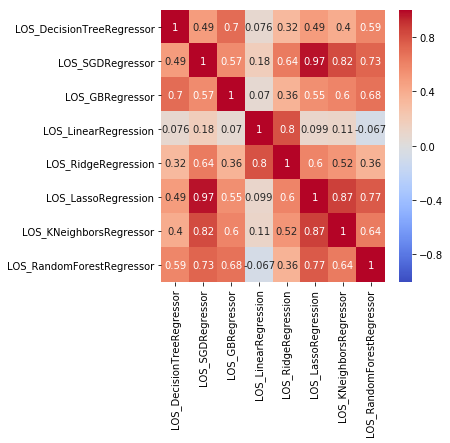

In [14]:
corr_matrix_results = df_results.drop(columns = ['PATIENT_NO']).corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix_results,
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [15]:
### remove SGD Regressor due to unusable result
df_usable_results = df_results.drop(columns = ['LOS_SGDRegressor'])

df_usable_results

,PATIENT_NO,LOS_DecisionTreeRegressor,LOS_GBRegressor,LOS_LinearRegression,LOS_RidgeRegression,LOS_LassoRegression,LOS_KNeighborsRegressor,LOS_RandomForestRegressor
0,17.0,4.0,9.546891,14.910886,14.115335,11.071785,10.0,12.8
1,19.0,16.0,15.960576,13.173605,12.964271,12.400243,11.2,14.1
2,20.0,19.0,20.419808,20.376011,19.411708,17.625605,17.0,17.9
3,23.0,19.0,19.325280,19.088280,17.726564,17.908057,17.0,17.5
4,24.0,19.0,18.738965,20.847170,18.348778,16.540803,14.6,16.3
5,25.0,19.0,19.166405,19.205987,18.241828,19.037866,17.0,17.5
6,26.0,19.0,19.325280,19.102994,17.790972,18.049283,17.0,17.5
7,27.0,12.0,12.616828,21.153850,18.238664,15.648441,14.0,11.5
8,28.0,19.0,19.098742,25.790431,21.984132,18.331736,17.0,17.9
9,29.0,19.0,18.939867,21.448118,19.526823,18.472962,17.0,17.2


## Parameter tuning and feature importance of Decision Tree Regressor

In [16]:
DecisionTreeRegressor().get_params().keys()

dict_keys(['criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [17]:
DecisionTreeRegressor().fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [18]:
# obtain new prediction results and replace into the result dataset
y_test_preds_DTR = DecisionTreeRegressor().fit(X_train, y_train).predict(X_test)

df_usable_results['LOS_DecisionTreeRegressor'] = y_test_preds_DTR

In [19]:
# calculate feature importance
feature_imp_DTR = pd.DataFrame(DecisionTreeRegressor().fit(X_train, y_train).feature_importances_,
                                   index = X_train.columns,
                                   columns=['Feature importance (DT Regressor)']).sort_values('Feature importance (DT Regressor)', ascending=False)

feature_imp_DTR

,Feature importance (DT Regressor)
AGE,0.615864
DAYS_OF_ONSET,0.270821
ORIGIN_CHINA,0.112313
SEX,0.001002
ORIGIN_EUROPE,0.000000
ORIGIN_US,0.000000
ORIGIN_ASEAN,0.000000
ORIGIN_DOMESTIC,0.000000
ONSET_FEVER,0.000000
ONSET_COUGH,0.000000


## Parameter tuning and feature importance of Gradient Boosting Regressor

In [20]:
# possible parameters for tuning
GradientBoostingRegressor().get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [21]:
# set the parameters by cross-validation
tuned_parameters_GBR = [{'n_estimators': [100, 200, 300],
                     'max_depth' : [3, 4],
                     'loss': ['ls', 'lad', 'huber']}]

# create and fit a ridge regression model, testing each alpha
reg_model_GBR = GradientBoostingRegressor()
grid_GBR = GridSearchCV(reg_model_GBR, tuned_parameters_GBR)
grid_GBR.fit(X_train, y_train)
reg_model_GBR_optimized = grid_GBR.best_estimator_

# summarize the results of the grid search
print(grid_GBR.best_score_)
print(grid_GBR.best_estimator_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


-0.998830623006626
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [22]:
# obtain new prediction results and replace into the result dataset
y_test_preds_GBR = reg_model_GBR_optimized.predict(X_test)

df_usable_results['LOS_GBRegressor'] = y_test_preds_GBR

In [23]:
# calculate feature importance
feature_imp_GBR = pd.DataFrame(reg_model_GBR_optimized.feature_importances_,
                                   index = X_train.columns,
                                   columns=['Feature importance (GB Regressor)']).sort_values('Feature importance (GB Regressor)', ascending=False)

feature_imp_GBR

,Feature importance (GB Regressor)
AGE,0.488307
DAYS_OF_ONSET,0.218004
ORIGIN_CHINA,0.062550
BACKGROUND_DISEASE,0.047734
SEX,0.038660
ORIGIN_EUROPE,0.028883
HOSPITAL,0.026501
ONSET_COUGH,0.023932
ONSET_TIRED,0.020779
ORIGIN_US,0.016227


## Parameter tuning and feature importance of Random Forest Regressor

In [24]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [25]:
# set the parameters by cross-validation
tuned_parameters_RFR = [{
    'max_depth' : [40, 50, 60, 70, 80, 90, 100, 110],
    'max_features' : ['auto','sqrt'],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10]
}]

# create and fit a ridge regression model, testing each alpha
reg_model_RFR = RandomForestRegressor()
grid_RFR = GridSearchCV(reg_model_RFR, tuned_parameters_RFR)
grid_RFR.fit(X_train, y_train)
reg_model_RFR_optimized = grid_RFR.best_estimator_

# summarize the results of the grid search
print(grid_RFR.best_score_)
print(grid_RFR.best_estimator_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWar

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

-0.2500490184023876
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

In [26]:
y_test_preds_RFR = reg_model_RFR_optimized.predict(X_test)

df_usable_results['LOS_RandomForestRegressor'] = y_test_preds_RFR

In [27]:
feature_imp_RFR = pd.DataFrame(reg_model_RFR_optimized.feature_importances_,
                                   index = X_train.columns,
                                   columns=['Feature importance (RF Regressor)']).sort_values('Feature importance (RF Regressor)', ascending=False)

feature_imp_RFR

,Feature importance (RF Regressor)
AGE,0.591083
SEX,0.364105
DAYS_OF_ONSET,0.044812
ORIGIN_EUROPE,0.000000
ORIGIN_CHINA,0.000000
ORIGIN_US,0.000000
ORIGIN_ASEAN,0.000000
ORIGIN_DOMESTIC,0.000000
ONSET_FEVER,0.000000
ONSET_COUGH,0.000000


## Parameter tuning for K Neighbors Regressor

In [28]:
KNeighborsRegressor().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [29]:
tuned_parameters_KNR = [{
    'n_neighbors' : [4]
}]

# create and fit a ridge regression model, testing each alpha
reg_model_KNR = KNeighborsRegressor()
grid_KNR = GridSearchCV(reg_model_KNR, tuned_parameters_KNR)
grid_KNR.fit(X_train, y_train)
reg_model_KNR_optimized = grid_KNR.best_estimator_

# summarize the results of the grid search
print(grid_KNR.best_score_)
print(grid_KNR.best_estimator_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


-0.6323068676469784
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
y_test_preds_KNR = reg_model_KNR_optimized.predict(X_test)

df_usable_results['LOS_KNeighborsRegressor'] = y_test_preds_KNR

## Parameter tuning for Ridge Regression

In [31]:
Ridge().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [32]:
tuned_parameters_Ridge = [{
    'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 2, 5 , 10, 20]
}]

# create and fit a ridge regression model, testing each alpha
reg_model_Ridge = Ridge()
grid_Ridge = GridSearchCV(reg_model_Ridge, tuned_parameters_Ridge, scoring = "neg_mean_squared_error", cv = 5)
grid_Ridge.fit(X_train, y_train)
reg_model_Ridge_optimized = grid_Ridge.best_estimator_

# summarize the results of the grid search
print(grid_Ridge.best_score_)
print(grid_Ridge.best_estimator_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.08983e-19): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.05592e-19): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.61008e-20): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.32937e-19): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.17831e-19): result may not be accurate.
  overwrite_a=True).T


-24.88270549569824
Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [33]:
y_test_preds_Ridge = reg_model_Ridge_optimized.predict(X_test)

df_usable_results['LOS_RidgeRegression'] = y_test_preds_Ridge

## Parameter tuning for LASSO Regression

In [34]:
Lasso().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [35]:
tuned_parameters_Lasso = [{
    'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 2, 5 , 10, 20]
}]

# create and fit a ridge regression model, testing each alpha
reg_model_Lasso = Lasso(max_iter = 1e5)
grid_Lasso = GridSearchCV(reg_model_Lasso, tuned_parameters_Lasso, scoring = "neg_mean_squared_error", cv = 5)
grid_Lasso.fit(X_train, y_train)
reg_model_Lasso_optimized = grid_Lasso.best_estimator_

# summarize the results of the grid search
print(grid_Lasso.best_score_)
print(grid_Lasso.best_estimator_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did no

-22.500882131218557
Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=100000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [36]:
y_test_preds_Lasso = reg_model_Lasso_optimized.predict(X_test)

df_usable_results['LOS_LassoRegression'] = y_test_preds_Lasso

## Extreme Gradient Boosting Regressor

In [43]:
xgb.XGBRegressor().get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'importance_type', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])

In [58]:
reg_model_XGB = xgb.XGBRegressor()

reg_model_XGB.fit(X_train, y_train)

y_test_preds_XGB = reg_model_XGB.predict(X_test)

df_usable_results['LOS_XGBRegressor'] = y_test_preds_XGB

[11:02:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [59]:

import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [60]:
from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(reg_model_XGB, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

[11:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean cross-validation score: -5.61


In [61]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(reg_model_XGB, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[11:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

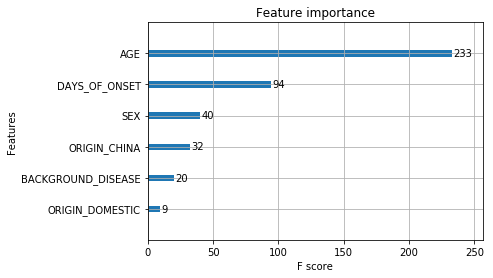

In [65]:
xgb.plot_importance(reg_model_XGB)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

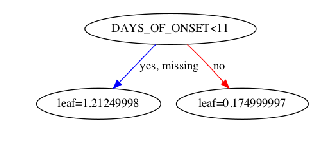

In [69]:
import graphviz
xgb.plot_tree(reg_model_XGB,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

## Extract final results

In [62]:
df_usable_results

,PATIENT_NO,LOS_DecisionTreeRegressor,LOS_GBRegressor,LOS_LinearRegression,LOS_RidgeRegression,LOS_LassoRegression,LOS_KNeighborsRegressor,LOS_RandomForestRegressor,LOS_XGBRegressor
0,17.0,4.0,9.531266,14.910886,11.577881,11.275083,10.75,9.526181,13.719287
1,19.0,16.0,14.742128,13.173605,12.606001,11.409882,11.25,10.951538,15.295944
2,20.0,19.0,18.442528,20.376011,18.135576,16.397457,16.75,16.419563,19.371668
3,23.0,19.0,19.101216,19.088280,17.936256,16.667055,19.00,14.465992,19.590353
4,24.0,19.0,18.661970,20.847170,17.008116,15.588661,14.75,16.419563,18.407509
5,25.0,19.0,19.079439,19.205987,18.965317,17.745450,19.00,14.465992,19.262774
6,26.0,19.0,19.101216,19.102994,18.064889,16.801855,19.00,14.465992,19.590353
7,27.0,12.0,12.449858,21.153850,16.297856,14.510266,12.75,15.227897,12.431307
8,28.0,19.0,18.763398,25.790431,19.092323,17.071453,19.00,16.419563,18.899490
9,29.0,19.0,18.725260,21.448118,18.870508,17.206253,19.00,16.419563,18.571911


In [63]:
df_usable_results.describe()

,PATIENT_NO,LOS_DecisionTreeRegressor,LOS_GBRegressor,LOS_LinearRegression,LOS_RidgeRegression,LOS_LassoRegression,LOS_KNeighborsRegressor,LOS_RandomForestRegressor,LOS_XGBRegressor
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,95.854305,14.185430,14.051982,17.897486,13.753405,12.387400,12.369205,12.586776,14.421782
std,43.971263,3.871957,2.344035,2.853030,2.223664,2.216631,2.339486,2.013168,2.526847
min,17.000000,4.000000,8.770202,12.020636,9.390186,8.039899,8.750000,9.526181,7.590475
25%,58.500000,14.000000,12.137054,15.489303,12.310245,10.735885,11.250000,10.951538,12.829687
50%,96.000000,14.000000,13.799014,18.455605,12.863266,11.679481,12.000000,12.300229,14.630275
75%,133.500000,16.000000,14.739403,20.697736,14.966631,13.836270,12.750000,14.027669,15.295944
max,171.000000,19.000000,19.101216,25.790431,20.452590,19.632640,19.000000,16.419563,20.062531


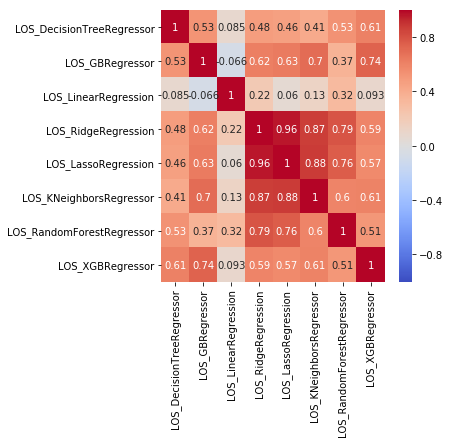

In [64]:

corr_matrix_usable_results = df_usable_results.drop(columns = ['PATIENT_NO']).corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix_usable_results,
            vmin=-1,
            cmap='coolwarm',
            annot=True);